In [1]:
# import things
import torch
from torchvision import datasets, transforms
import helper

In [2]:
# transform definition for normalizing data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5, 0.5), (0.5, 0.5, 0.5, 0.5))
])

# Download and load training data
trainset = datasets.FashionMNIST('F_MNIST_data', download=True, transform=transform, train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('F_MNIST_data', download=True, transform=transform, train=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


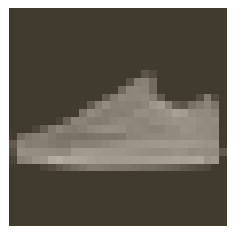

In [3]:
images, labels = next(iter(trainloader))
helper.imshow(images[0, :])

In [6]:
print('size of images: {}'.format(images.size()))
print('size of labels: {}'.format(labels.size()))

size of images: torch.Size([64, 1, 28, 28])
size of labels: torch.Size([64])


In [7]:
# import necessary packages
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

## Building The Networks